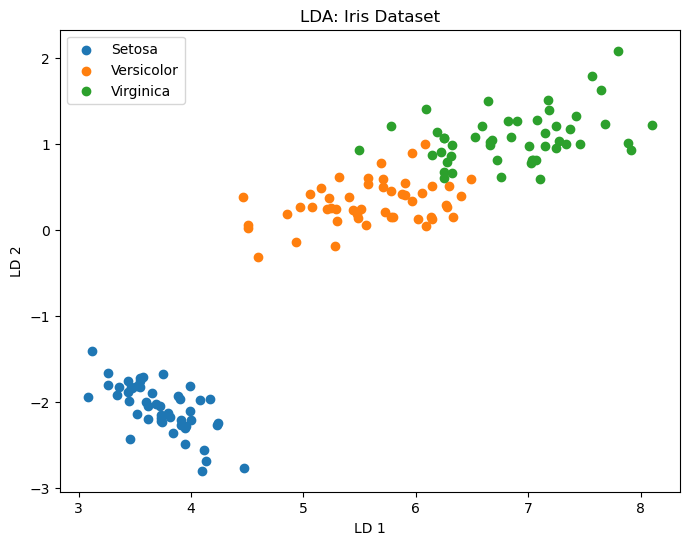

In [6]:
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt
from typing import Optional, Union

class LDA:
    def __init__(self, n_components: Optional[int] = None):
        self.n_components = n_components
        self.eigenvalues = None
        self.eigenvectors = None

    def fit(self, X, y):
        if self.n_components is None or self.n_components > X.shape[1]:
            n_components = X.shape[1]
        else:
            n_components = self.n_components
        
        n_features = np.shape(X)[1]
        labels = np.unique(y)
        
        
        S_W = np.zeros((n_features, n_features))
        for label in labels:
            _X = X[y == label]
            S_W += (len(_X) - 1) * np.cov(_X, rowvar=False)

        
        total_mean = np.mean(X, axis=0)
        S_B = np.zeros((n_features, n_features))
        for label in labels:
            _X = X[y == label]
            _mean = np.mean(_X, axis=0)
            S_B += len(_X) * (_mean - total_mean).dot((_mean - total_mean).T)
            
        
        A = np.linalg.inv(S_W).dot(S_B)

        
        eigenvalues, eigenvectors = np.linalg.eigh(A)

        
        idx = eigenvalues.argsort()[::-1]
        eigenvalues = eigenvalues[idx][:n_components]
        eigenvectors = eigenvectors[:, idx][:, :n_components]
        
        self.eigenvalues = eigenvalues
        self.eigenvectors = eigenvectors
        
    def fit_transform(self, X: Union[list, np.ndarray], y: np.ndarray) -> np.ndarray:
        self.fit(X, y)  
        return self.transform(X)        
    
    def transform(self, X):
        return np.dot(X, self.eigenvectors)
    
    @property
    def explained_variance_ratio_(self) -> np.ndarray:
        return self.eigenvalues / np.sum(self.eigenvalues)


if __name__ == '__main__':
    from sklearn import datasets

    np.random.seed(5)

    iris = datasets.load_iris()
    X = iris.data
    y = iris.target

    
    lda = LDA(n_components=2)
    X_lda = lda.fit_transform(X, y)  

   
    plt.figure(figsize=(8, 6))
    for name, label in [('Setosa', 0), ('Versicolor', 1), ('Virginica', 2)]:
        plt.scatter(X_lda[y == label, 0], X_lda[y == label, 1], label=name)
    
    plt.xlabel("LD 1")
    plt.ylabel("LD 2")
    plt.title("LDA: Iris Dataset")
    plt.legend()
    plt.show()


In [8]:
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from typing import Optional, Union

class LDA:
    def __init__(self, n_components: Optional[int] = None):
        self.n_components = n_components
        self.eigenvalues = None
        self.eigenvectors = None

    def fit(self, X, y):
        if self.n_components is None or self.n_components > X.shape[1]:
            n_components = X.shape[1]
        else:
            n_components = self.n_components
        
        n_features = np.shape(X)[1]
        labels = np.unique(y)
        
        
        S_W = np.zeros((n_features, n_features))
        for label in labels:
            _X = X[y == label]
            S_W += (len(_X) - 1) * np.cov(_X, rowvar=False)

      
        total_mean = np.mean(X, axis=0)
        S_B = np.zeros((n_features, n_features))
        for label in labels:
            _X = X[y == label]
            _mean = np.mean(_X, axis=0)
            S_B += len(_X) * (_mean - total_mean).dot((_mean - total_mean).T)
            
       
        A = np.linalg.inv(S_W).dot(S_B)
        
       
        eigenvalues, eigenvectors = np.linalg.eigh(A)
        
        
        idx = eigenvalues.argsort()[::-1]
        eigenvalues = eigenvalues[idx][:n_components]
        eigenvectors = eigenvectors[:, idx][:, :n_components]
        
        self.eigenvalues = eigenvalues
        self.eigenvectors = eigenvectors
        
    def fit_transform(self, X: Union[list, np.ndarray], y: np.ndarray) -> np.ndarray:
        self.fit(X, y)  
        return self.transform(X)        
    
    def transform(self, X):
        return np.dot(X, self.eigenvectors)
    
    @property
    def explained_variance_ratio_(self) -> np.ndarray:
        return self.eigenvalues / np.sum(self.eigenvalues)


if __name__ == '__main__':
    iris = datasets.load_iris()
    X = iris.data
    y = iris.target
    
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

 
    lda = LDA(n_components=2)
    X_train_lda = lda.fit_transform(X_train, y_train)
    X_test_lda = lda.transform(X_test)
    
  
    rf = RandomForestClassifier(random_state=42)
    rf.fit(X_train, y_train)
    y_pred_before_lda = rf.predict(X_test)
    accuracy_before_lda = accuracy_score(y_test, y_pred_before_lda)
    print(f'Accuracy (Before LDA): {accuracy_before_lda:.4f}')

   
    rf.fit(X_train_lda, y_train)
    y_pred_after_lda = rf.predict(X_test_lda)
    accuracy_after_lda = accuracy_score(y_test, y_pred_after_lda)
    print(f'Accuracy (After LDA): {accuracy_after_lda:.4f}')


Accuracy (Before LDA): 1.0000
Accuracy (After LDA): 0.9667
